In [6]:
#convergenza puntuale ma non uniforme
@interact
def _(n=(1,1.1,..,20)):
    show(plot(x^n,(x,0,1), rgbcolor=(n/20,0,1-n/20),ymin=0, ymax=1, title='Grafico funzione $y=x^n$'))

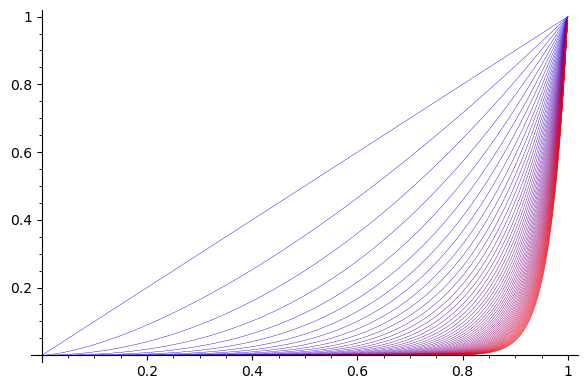

In [4]:
P = sum(plot(x^n ,(x,0,1), rgbcolor=(n/30,0,1-n/30), thickness = 0.3) for n in [1,1.5,..,30])
P.show()

In [7]:
#mollificatore standard
@interact
def _(n=(1,1.1, .. ,10)):
    show(plot(n *exp(-(n*x)^2),(x,-1,1),  rgbcolor=(n/10,0,1-n/10), ymin=0, ymax=10, title="Grafico mollificatore standard"))

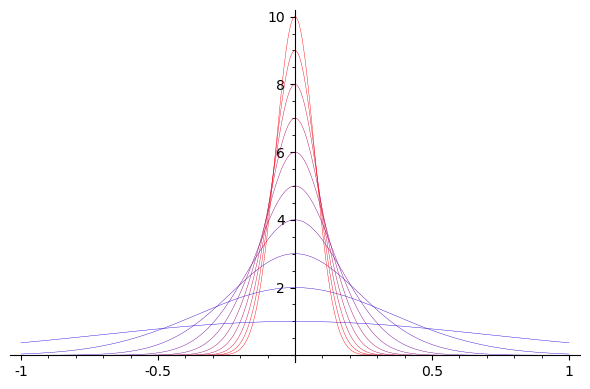

In [6]:
P2 = sum(plot( n *exp(-(n*x)^2) ,(x,-1,1), rgbcolor=(n/10,0,1-n/10), thickness = 0.3) for n in [1,2,..,10])
P2.show()

In [8]:
def mollifier(n,x):
    return n/(sqrt(pi)) *exp(-(n*x)^2)

def mollifier2(n,x):
    return n/pi * (1/(1+(n*x)^2))

def mollifier3_mother(x):
    if -1<x<1:
        return ((0.44399381617003153) ^(-1)) * exp(-1/(1-x^2))
    else:
        return 0
    
def mollifier3(n,x):
    return n* mollifier3_mother(n*x)
   


In [9]:
x0=var('x0')
@interact
def _(n=(1,..,50)):
    heaviside_mollified(x) = integral(mollifier(n,x0),x0,-oo, x )
    heaviside_mollified2(x) = integral(mollifier2(n,x0),x0,-oo, x )
    # heaviside_mollified3(x) = numerical_approx(integral(mollifier2(n,x0),x0,-oo, x ))
    show(heaviside)
    show(   heaviside_mollified(x) )
    show(  heaviside_mollified2(x) )
    show(plot(heaviside, color='red', thickness = 2) + plot(heaviside_mollified, color = 'green') + plot(heaviside_mollified2)  )

In [4]:
#definizione armoniche elementari reali
def harmonic_S(n,x):
    return sin(n*x)
def harmonic_C(n,x):
    return cos(n*x)

In [17]:
#approssimazione di una funzione per una ridotta N-esima
#x0=var('x0')
@interact
def _(f=2*x^3 + 3*x^2-10*x, N=[1,..,10] , auto_update=False):
    SN(x)= 1/(2*pi) * integral(f(x),x,-pi, pi) + sum( 1/(pi)*integral(harmonic_S(n,x)*f(x),x,-pi,pi) * harmonic_S(n,x) + 1/(pi)*integral(harmonic_C(n,x)*f(x),x,-pi,pi) * harmonic_C(n,x)  for n in [1,2,..,N] )
    show(plot(SN,-pi,pi) + plot(f,-pi,pi, color='red')
        # + plot((f-SN)^2, -pi, pi, color='green') 
        )
    show(  integral((f-SN)^2, x, -pi, pi))

In [14]:
#definizione base di Haar
def haar_mother(x):
    if 0<x<1/2:
        return -1
    if 1/2 < x <1:
        return 1
    else:
        return 0
    
def haar(n,k,x):
    return  2^(n/2)* haar_mother(2^n*x-k)

In [2]:
@interact
def _(n=(1,2,..,7), k=(0,1,..,2^7-1)):
    show(line([(t/(2^10),  haar(n,k,t/(2^10))) for t in range(0,2^10)]))

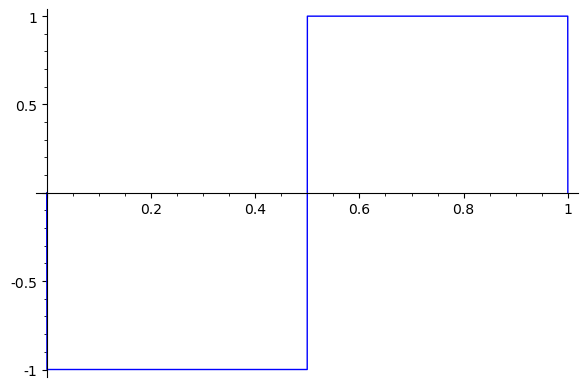

In [3]:
plot(haar_mother,0,1)